# Data Understanding
For each subsection will b specified:
 - the related issue: e.g. (`#3`)
 - the assignee (`djanloo`, `tommy`)

| Task | Issue | Assignee |
| ----:| -----:| --------:|
| **semantics**   | `#4`| `djanloo` |
| **distribution** | `#4`| `djanloo` |
| **quality**    | `#5`| `tommy`  |
| **transformations**    | `#5`| `tommy`  |
| **correlations**    | `#4`| `djanloo`  |

In [93]:
# Imports and preliminary stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl

# Sets default font
mpl.rcParams['font.size'] = 9.0

import seaborn as sns
sns.set()

In [94]:
df = pd.read_csv("ravdess_features.csv")
# Set to display all fields
pd.set_option('display.max_rows', 15, 'display.max_columns', None)
display(df)
len(df)
len(df.columns)

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,channels,sample_width,frame_rate,frame_width,length_ms,frame_count,intensity,zero_crossings_sum,mfcc_mean,mfcc_std,mfcc_min,mfcc_max,sc_mean,sc_std,sc_min,sc_max,sc_kur,sc_skew,stft_mean,stft_std,stft_min,stft_max,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,audio-only,speech,fearful,normal,Dogs are sitting by the door,2nd,2.0,F,1,2,48000,2,3737,179379.0,-36.793432,16995,-33.485947,134.654860,-755.22345,171.69092,5792.550744,3328.055457,0.000000,13541.959028,-1.120769,0.250940,0.415250,0.335533,0.000000,1.0,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,audio-only,speech,angry,normal,Dogs are sitting by the door,1st,16.0,F,1,2,48000,2,3904,187387.0,NaN,13906,-29.502108,130.485630,-713.98560,205.00770,5197.620555,4040.931570,0.000000,12000.290443,-1.531204,0.219582,0.417488,0.352380,0.000000,1.0,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,audio-only,NaN,happy,strong,Dogs are sitting by the door,2nd,16.0,F,1,2,48000,2,4671,224224.0,-32.290737,18723,-30.532463,126.577110,-726.06036,165.45653,4830.743037,3332.131300,0.000000,12007.751173,-1.130153,0.436699,0.379758,0.352270,0.000000,1.0,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,audio-only,NaN,surprised,normal,Kids are talking by the door,1st,14.0,F,1,2,48000,2,3637,174575.0,-49.019839,11617,-36.059555,159.725160,-842.94635,190.03609,5376.446478,4053.663073,0.000000,12048.223893,-1.497765,0.098802,0.407277,0.360552,0.000000,1.0,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,audio-only,song,happy,strong,Dogs are sitting by the door,2nd,2.0,F,1,2,48000,2,4404,211411.0,-31.214503,15137,-31.405996,122.125824,-700.70276,161.13400,5146.012474,3442.724109,0.000000,12025.582707,-1.167544,0.496066,0.415974,0.350655,0.000000,1.0,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,audio-only,speech,calm,strong,Kids are talking by the door,1st,23.0,M,1,2,48000,2,4605,221021.0,NaN,9871,-30.225578,158.845500,-855.92420,208.18497,5886.647366,4114.260257,0.000000,12210.517144,-1.588861,0.184390,0.573838,0.304496,0.000000,1.0,-1.075888,-0.310088,9.367040e-07,0.005260,-0.039856,0.052399,9.551363,0.759247
2448,audio-only,speech,calm,normal,Dogs are sitting by the door,1st,23.0,M,1,2,48000,2,4171,200200.0,-43.342901,8963,-31.160332,157.499700,-825.37410,220.79490,6602.742127,4191.727090,0.000000,12064.561791,-1.614582,-0.113920,0.591010,0.306333,0.000000,1.0,-1.026071,-0.408018,4.614221e-07,0.006836,-0.064178,0.084045,22.517991,1.073633
2449,audio-only,song,sad,strong,Dogs are sitting by the door,2nd,23.0,M,1,2,48000,2,5239,251451.0,NaN,9765,-26.135280,138.133210,-768.36536,235.53938,4654.156076,4231.511986,0.000000,12207.179884,-1.337419,0.619346,0.467994,0.347843,0.000000,1.0,-1.473789,0.130310,-8.219263e-06,0.015384,-0.093079,0.097260,4.964319,-0.005821
2450,audio-only,speech,surprised,normal,Kids are talking by the door,1st,NaN,M,1,2,48000,2,3737,179379.0,-45.751265,9716,-28.242815,159.943400,-868.09576,219.84350,5524.736973,3596.031841,760.822547,11981.912464,-1.465594,0.206481,0.578854,0.308684,0.001565,1.0,-1.277117,-0.242668,-4.400898e-06,0.005182,-0.057556,0.052002,13.855588,-0.110966


38

### Semantics

See report for variables meaning.

#### Data types

|feature | type |
|--------|------|
|modality|?|
|vocal_channel | binary |
|emotion | categorical |
|emo_intens | binary|
|statement|binary|
|repetition|binary|
|actor|categorical (marginally ordinal)|
|sex|binary|
|**others**| quantitative |


Since `modality` is categorical with only one value we drop it now. Same for `frame_rate`.

In [95]:
# Categorical/quantitative split
df.drop(columns=["modality", "frame_rate", "sample_width"], inplace=True)
categorical_features = ["vocal_channel", "emotion","emotional_intensity", 
                        "statement", "repetition", "actor", "sex", 
                        "frame_width", "channels"]
quantitative_features = [feat for feat in df.columns if not feat in categorical_features]

In [96]:
stats = df.describe()
display(stats)

print(f"Dataset has {len(df.columns)} features")

# Print fields with missing values
print("Missing values:")
for field in stats.columns:
    missing_ratio = 1 - stats[field]["count"] / len(df) 
    if missing_ratio > 0.0:
        print(f"Field {field:>10}: {missing_ratio*100:.1f}%  of missing ")
print()
# Check for field that have only one value
print("Features that have only one value:")
for field in stats.columns:
    if stats[field]["min"] == stats[field]["max"]:
        print(f"- {field}")


,actor,channels,frame_width,length_ms,frame_count,intensity,zero_crossings_sum,mfcc_mean,mfcc_std,mfcc_min,mfcc_max,sc_mean,sc_std,sc_min,sc_max,sc_kur,sc_skew,stft_mean,stft_std,stft_min,stft_max,stft_kur,stft_skew,mean,std,min,max,kur,skew
count,1326.000000,2452.000000,2452.000000,2452.000000,2452.000000,1636.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.0,2452.000000,2452.000000,2.452000e+03,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000
mean,12.582202,1.002447,2.004894,4092.151305,193587.188010,-37.625332,12885.314029,-28.769180,136.777233,-758.909381,199.182514,5170.101398,3365.453393,551.834124,11830.461864,-1.142642,0.348442,0.475846,0.331371,0.002272,1.0,-1.247929,0.112889,1.393649e-08,0.020504,-0.164871,0.179839,11.203002,-0.048245
std,6.916240,0.049416,0.098833,598.321526,36825.369056,8.451982,3665.319584,4.461886,20.451689,99.945452,26.002107,875.185444,580.479034,508.025890,1004.955976,0.572654,0.353005,0.082551,0.023773,0.004830,0.0,0.211781,0.330759,4.267587e-05,0.021024,0.175443,0.195539,6.614859,0.454925
min,1.000000,1.000000,2.000000,2936.000000,-1.000000,-63.864613,4721.000000,-43.812923,83.621370,-1085.479700,126.250810,2360.880942,1491.341071,0.000000,7657.495158,-1.795576,-0.510390,0.214089,0.210126,0.000000,1.0,-1.669603,-0.993957,-9.435575e-04,0.000652,-0.998810,0.004669,1.757794,-2.356526
25%,7.000000,1.000000,2.000000,3604.000000,172972.000000,-43.539869,10362.500000,-31.828597,122.623928,-826.464075,180.081417,4563.684781,3025.431971,0.000000,11516.034429,-1.496187,0.098549,0.415260,0.317780,0.000000,1.0,-1.390612,-0.094334,-1.394488e-06,0.006791,-0.202431,0.055489,6.519988,-0.336624
50%,13.000000,1.000000,2.000000,4004.000000,190591.000000,-37.072745,12383.500000,-28.681109,136.523810,-760.983065,201.697175,5122.712259,3433.835368,707.319256,12000.292653,-1.308938,0.347621,0.475740,0.334224,0.000190,1.0,-1.292105,0.126065,-9.810701e-08,0.013880,-0.103775,0.109726,9.828686,0.004256
75%,19.000000,1.000000,2.000000,4538.000000,217817.000000,-31.591309,14966.000000,-25.550238,151.385135,-692.890015,218.185288,5775.959809,3768.503344,977.693852,12091.886054,-0.982944,0.557427,0.530571,0.349272,0.001999,1.0,-1.152519,0.335574,8.363511e-07,0.026154,-0.054352,0.224487,14.085435,0.262978
max,24.000000,2.000000,4.000000,6373.000000,305906.000000,-16.353953,30153.000000,-15.491450,195.942920,-461.489320,280.173700,7655.335726,4819.783069,2121.417965,17477.540047,3.657953,1.825436,0.724077,0.391928,0.039378,1.0,0.794669,1.465815,1.222810e-03,0.152168,-0.006134,0.999146,59.085695,1.799676


Dataset has 35 features
Missing values:
Field      actor: 45.9%  of missing 
Field  intensity: 33.3%  of missing 

Features that have only one value:
- stft_max


From this we can conclude that:
- `sample_width`
- `frame_rate`
- `stft_max`

are **useless** features, since they are equal for everyone.

Furthermore, `actor` field has almost 50% of missing values, so it is higly probable that it will be useless too.

In [97]:
df.vocal_channel.isna().sum()/len(df)

0.0799347471451876

In [98]:
# Remove useless features
print(quantitative_features)
useless_features = ["channels", "sample_width", "frame_rate", "frame_count"]
try:
    df.drop(columns=useless_features, inplace=True)
except KeyError:
    pass
quantitative_features = list(set(quantitative_features) - set(useless_features))
quantitative_features.sort()
print(quantitative_features)

['length_ms', 'frame_count', 'intensity', 'zero_crossings_sum', 'mfcc_mean', 'mfcc_std', 'mfcc_min', 'mfcc_max', 'sc_mean', 'sc_std', 'sc_min', 'sc_max', 'sc_kur', 'sc_skew', 'stft_mean', 'stft_std', 'stft_min', 'stft_max', 'stft_kur', 'stft_skew', 'mean', 'std', 'min', 'max', 'kur', 'skew']
['intensity', 'kur', 'length_ms', 'max', 'mean', 'mfcc_max', 'mfcc_mean', 'mfcc_min', 'mfcc_std', 'min', 'sc_kur', 'sc_max', 'sc_mean', 'sc_min', 'sc_skew', 'sc_std', 'skew', 'std', 'stft_kur', 'stft_max', 'stft_mean', 'stft_min', 'stft_skew', 'stft_std', 'zero_crossings_sum']


### Distribution

In [99]:
for quant in quantitative_features:
    print(f"{quant}: ({min(df[quant])}, {max(df[quant])})")

intensity: (-63.86461280451597, -16.35395321583926)
kur: (1.7577937107178787, 59.0856953157985)
length_ms: (2936, 6373)
max: (0.0046691895, 0.9991455)
mean: (-0.00094355753, 0.00122281)
mfcc_max: (126.25081, 280.1737)
mfcc_mean: (-43.812923, -15.49145)
mfcc_min: (-1085.4797, -461.48932)
mfcc_std: (83.62137, 195.94292)
min: (-0.9988098, -0.006134033)
sc_kur: (-1.7955758197840703, 3.65795320733888)
sc_max: (7657.495157578353, 17477.540047120485)
sc_mean: (2360.880942063923, 7655.3357257345615)
sc_min: (0.0, 2121.417964626847)
sc_skew: (-0.510389863699567, 1.825435709232864)
sc_std: (1491.3410712240702, 4819.783069483219)
skew: (-2.356526029152903, 1.7996757431187027)
std: (0.00065187906, 0.15216799)
stft_kur: (-1.669602914053932, 0.7946685392653179)
stft_max: (1.0, 1.0)
stft_mean: (0.21408944, 0.72407687)
stft_min: (0.0, 0.03937785)
stft_skew: (-0.9939573942877428, 1.465815085563003)
stft_std: (0.2101258, 0.3919277)
zero_crossings_sum: (4721, 30153)


##### Trivial quantitative features

/home/djanloo/.local/share/virtualenvs/dynamiting-oYIjB6ZE/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


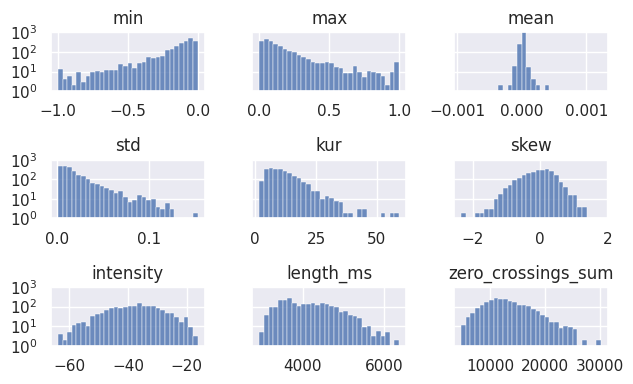

In [100]:
fig, axes = plt.subplots(3,3, sharey = True, figsize=(6.5,4))
axes = axes.flatten()
trivial_quant_features = ["min", "max","mean", "std", "kur", "skew", "intensity", "length_ms", "zero_crossings_sum"]
# Single histogram information template
for f ,ax in zip(trivial_quant_features, axes):
    x = df[f]#(df[f] -  min(df[f]))/(max(df[f]) - min(df[f]) )
    sns.histplot(data=x, label="f", bins=30, alpha=0.8, ax=ax)
    ax.set_title(f)
    ax.set_yscale("log")
    ax.set_xlabel("")
    # ax.set_xticks([])
    ax.set_ylabel("")
    ax.set_ylim(1, 1000)
fig.savefig("trivial_distributions.pdf")


In [101]:
df[["min", "max"]].corr(method="pearson").values

array([[ 1.        , -0.97988944],
       [-0.97988944,  1.        ]])

#### Per-family distributions

In [102]:
from sklearn.preprocessing import MinMaxScaler
df_rescaled = df.copy()

stats1 = ["min", "max", "mean", "std"]
stats2 = ["min", "max", "mean", "std", "kur", "skew"]
mfcc_family = [f"mfcc_{u}" for u in stats1]
stft_family = [f"stft_{u}" for u in stats2]
sc_family = [f"sc_{u}" for u in stats2]

for family in [mfcc_family, sc_family, stft_family]:
    for feature in family:
        df_rescaled[feature] = MinMaxScaler().fit_transform(df[feature].to_numpy().reshape(-1,1))

df = df_rescaled

/home/djanloo/.local/share/virtualenvs/dynamiting-oYIjB6ZE/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


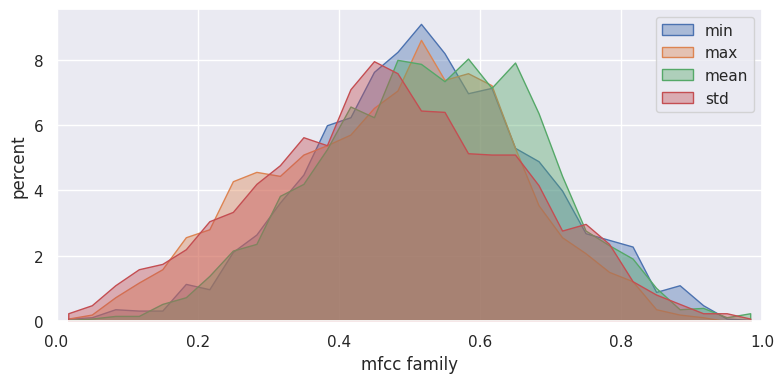

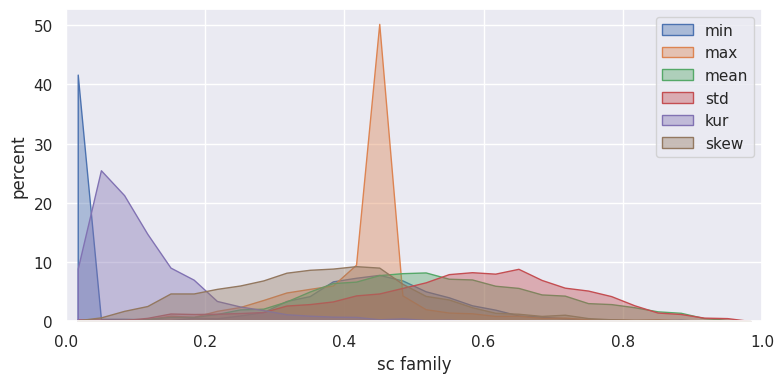

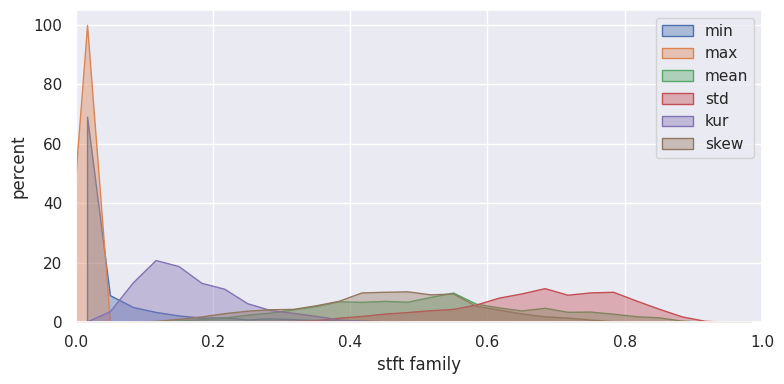

In [103]:

stat = "percent"
element="poly"
bins=30

plt.figure(1,  figsize=(8,4))
for f in mfcc_family:
    ax = sns.histplot(data=df, x=f, label=f, bins=bins, alpha=0.4, element=element, stat=stat)
plt.legend(stats1)
ax.set(xlabel="mfcc family", ylabel=stat)
ax.set_xlim(0,1)

plt.savefig("mfcc_family_hist.pdf")

plt.figure(2, figsize=(8,4))
for f in sc_family:
    ax = sns.histplot(data=df, x=f, label=f, bins=bins, alpha=0.4, element=element, stat=stat)
plt.legend(stats2)
ax.set(xlabel="sc family", ylabel=stat)
ax.set_xlim(0,1)

plt.savefig("sc_family_hist.pdf")

plt.figure(3,  figsize=(8,4))
for f in stft_family:
    ax = sns.histplot(data=df,  x=f,label=f, bins=bins, alpha=0.4, element=element, stat=stat)
plt.legend(stats2)
ax.set(xlabel="stft family", ylabel=stat)
ax.set_xlim(0,1)
plt.savefig("stft_family_hist.pdf")

/home/djanloo/.local/share/virtualenvs/dynamiting-oYIjB6ZE/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


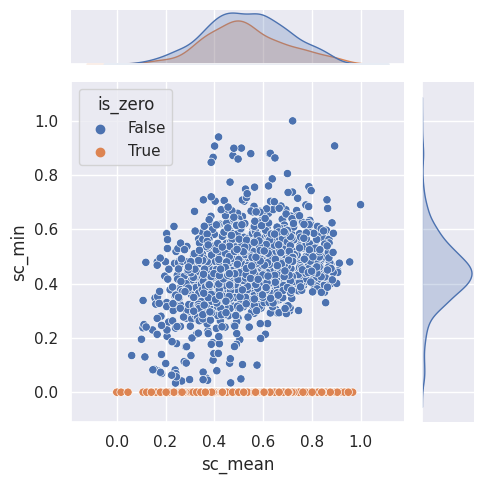

In [104]:
from sklearn.preprocessing import MinMaxScaler

s = MinMaxScaler()
x,y = s.fit_transform(df[["sc_mean", "sc_min"]]).T
is_zero = (y==0)
tmp_df = pd.DataFrame(dict(sc_mean=x, sc_min=y, is_zero=is_zero))

sns.jointplot(data=tmp_df, x="sc_mean", y="sc_min", hue="is_zero", height=5)
plt.savefig("patological_sc.pdf")


/home/djanloo/.local/share/virtualenvs/dynamiting-oYIjB6ZE/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


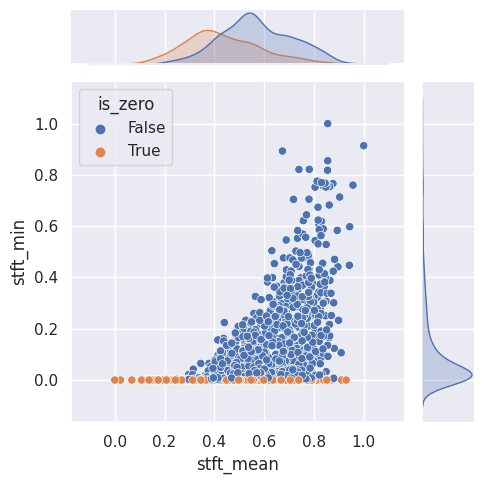

In [105]:
s = MinMaxScaler()
x,y = s.fit_transform(df[["stft_mean", "stft_min"]]).T
is_zero = (y==0)
tmp_df = pd.DataFrame(dict(stft_mean=x, stft_min=y, is_zero=is_zero))


sns.jointplot(data=tmp_df, x="stft_mean", y="stft_min", hue="is_zero", height=5)
plt.savefig("patological_stft.pdf")

/home/djanloo/.local/share/virtualenvs/dynamiting-oYIjB6ZE/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


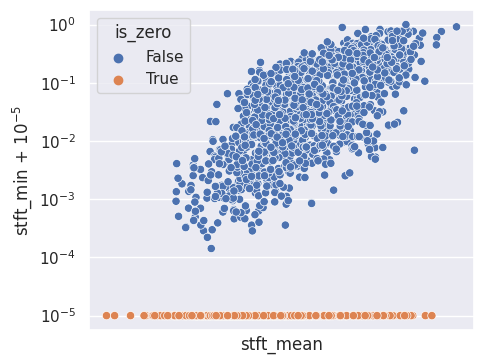

In [106]:
fig, ax=plt.subplots(figsize=(5,3.8))

s = MinMaxScaler()
x,y = s.fit_transform(df[["stft_mean", "stft_min"]]).T
is_zero = (y==0)
tmp_df = pd.DataFrame(dict(stft_mean=x, stft_min=y+1e-5, is_zero=is_zero))


sns.scatterplot(data=tmp_df, x="stft_mean", y="stft_min", hue="is_zero", ax=ax)
plt.yscale("log")
plt.xticks([])
plt.ylabel("stft_min + $10^{-5}$")
plt.savefig("patological_stft_log.pdf")


At first glance some features are distributed in a "uneven" way, such as:

- kur
- max
- min
- sc_kur
- stft_kur
- std
- **mean** 
- **sc_min**
- **stft_min**


the last three appear to be somewhat patological since:
- log(std) is proportional to intensity (redundancy)
- mean is not distributed
- sc_min, stft_min are "bimodal"


Since these features span many orders of magnitude, a `log_scale` is suggested for transformation

For the "patological" ones:

This means that:
- mean feature is better-behaved if log-scaled, after being transported to non-negative values
- sc_min and stft_min has to be deeper investigated

##### Categorical features

/home/djanloo/.local/share/virtualenvs/dynamiting-oYIjB6ZE/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


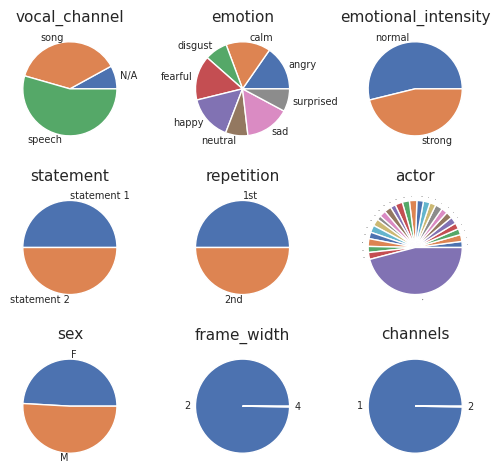

In [107]:
fig, axes = plt.subplots(3,3, figsize=(5,5))
df_clean_labels = df.copy()
df_clean_labels.actor = pd.Categorical(df_clean_labels.actor).codes
df_clean_labels.vocal_channel.fillna("N/A", inplace=True)
df_clean_labels.replace({'statement': {"Dogs are sitting by the door": "statement 1", 
                                        "Kids are talking by the door": "statement 2"}}, inplace=True)
df_clean_labels.replace({'actor': {-1: "N/A"}}, inplace=True)
                                        
_ = [ax.axis("off") for ax in axes.flatten()]
for cat, ax in zip(categorical_features, axes.flatten()):
    if cat=="actor":
        textprops = {'fontsize': 0}
    else:
        textprops={'fontsize': 7}
    df_clean_labels.groupby(cat).size().plot(kind='pie', 
                                    textprops=textprops,
                                    # colors=['tomato', 'gold', 'skyblue'], 
                                    ax=ax)
    ax.set_title(cat, size=11)
fig.savefig("categorical_distrib.pdf")


In [108]:
np.unique(df_clean_labels.frame_width.apply(str))

array(['2', '4'], dtype=object)

/home/djanloo/.local/share/virtualenvs/dynamiting-oYIjB6ZE/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


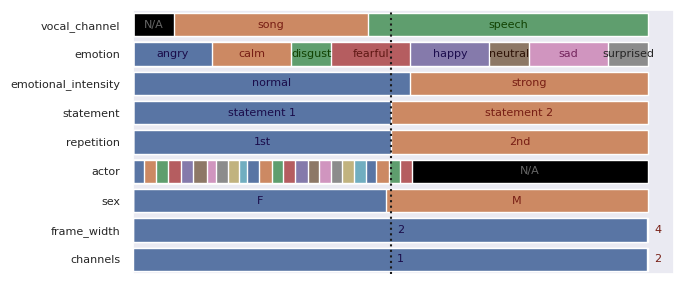

In [109]:
fig,ax = plt.subplots(figsize=(7,3))

for i, cat in enumerate(categorical_features):
    okay = np.zeros(len(df_clean_labels))
    row = df_clean_labels[cat].apply(str)
    prev_y = 0
    for j, value in enumerate(np.unique(row)):
        y = np.zeros(len(categorical_features))
        okay = (okay)|(row == value)
        y[i] = np.sum(okay)/len(df)

        if value == "N/A":
            color = (0,0,0)
        else:
            color = sns.color_palette()[j%10]
        # print(f"{cat} - {value} -> {np.sum(okay)}")
        sns.barplot(x=y, y=categorical_features, ax = ax, orient="h", alpha=1, color=color, zorder=-j)
        color = np.abs(np.array(color) - np.array([0.4,0.4,0.4]))
        if cat == "frame_width" or cat=="channels":
            ax.annotate(value, xy=((y[i] + prev_y)/2+0.02, i), size=8, color=color, ha="center", va="center")
        elif cat != "actor" or value=="N/A":
            ax.annotate(value, xy=((y[i] + prev_y)/2, i), size=8, color=color, ha="center", va="center")
        prev_y = y[i]
ax.set_yticks(range(len(categorical_features)), labels=categorical_features,size=8)
ax.set_xticks([])
ax.axvline(0.5, ls=":", zorder=100, color='k')
print()
fig.savefig("categorical_bars.pdf")

#### Conditional distributions

Check whether it exists some feature that can discriminate between male and female or song/speech just with the distribution

It can be seen that `stft_min` mildly discriminate between males and females, while `sc_mean` does the same on song/speech

### Quality

#### intensity

First of all, missing valus of `intensity` feature are replaced using the decibel conversion on `std`

/home/djanloo/.local/share/virtualenvs/dynamiting-oYIjB6ZE/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


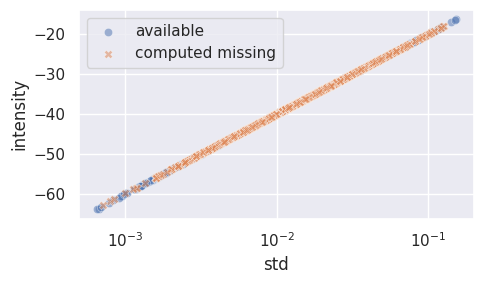

In [110]:
fig, ax = plt.subplots(figsize=(5,3))
x = df["std"][df.intensity.isna()]
y = 20*np.log10(x)
sns.scatterplot(data=df, x="std", y="intensity", ax=ax, label="available", alpha=0.5)
sns.scatterplot(x=x,y=y,marker="X", label="computed missing", ax=ax, alpha=0.5)
ax.set_xscale("log")
fig.savefig("intensity_fill.pdf")

In [111]:
df.intensity[df.intensity.isna()] = 20*np.log10(df["std"][df.intensity.isna()])

/tmp/ipykernel_8739/3702779853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.intensity[df.intensity.isna()] = 20*np.log10(df["std"][df.intensity.isna()])


#### Actor
Check if actor can be deduced from the others categotical features

/home/djanloo/.local/share/virtualenvs/dynamiting-oYIjB6ZE/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


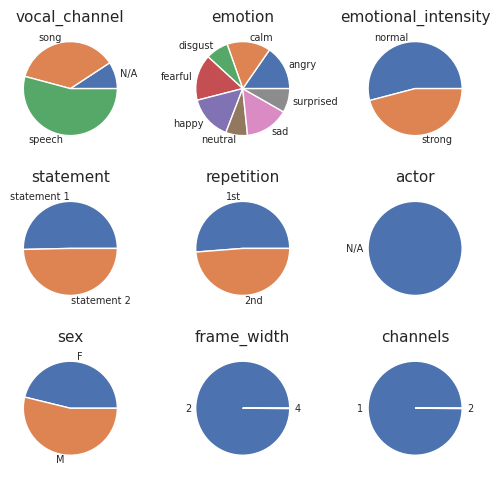

In [112]:
df_missing_actors = df[df.actor.isna()]
fig, axes = plt.subplots(3,3, figsize=(5,5))
df_clean_labels = df_missing_actors.copy()
df_clean_labels.actor = pd.Categorical(df_clean_labels.actor).codes
df_clean_labels.vocal_channel.fillna("N/A", inplace=True)
df_clean_labels.replace({'statement': {"Dogs are sitting by the door": "statement 1", 
                                        "Kids are talking by the door": "statement 2"}}, inplace=True)
df_clean_labels.replace({'actor': {-1: "N/A"}}, inplace=True)
                                        
_ = [ax.axis("off") for ax in axes.flatten()]
for cat, ax in zip(categorical_features, axes.flatten()):
    df_clean_labels.groupby(cat).size().plot(kind='pie', 
                                    textprops={'fontsize': 7},
                                    # colors=['tomato', 'gold', 'skyblue'], 
                                    ax=ax)
    ax.set_title(cat, size=11)

So nothing of interest. Actor field is uniformely deleted.

#### Fourier tranform min zeros

It is possible to see that two features (`sc_min`, `stft_min`) are not well behaved

Indeed, both those values are often both equal to zero. The ratio of such samples over the total is:

In [113]:
print(((df.sc_min==0)&(df.stft_min==0)).sum()/len(df)*100)

41.6394779771615


So almost half of the dataset seem to suffer from a numerical problem: since both variables are the result of the `min` operation over the power spectrum, it is possible that some spurious zeros (maybe due to acoustic noise or sampling problem) set these features to zero.

For the sake of correlations, let's see if those patological samples are ralated to some categorical features

It doesn't seem that patological samples of `sc_min` belong to a certain category.

So `stft_min` patological samples do not match any category. This means that classification can't take any information from those and a correction operation is allowed.

Let's do the pie chart of the patological features to check whether they are biased in some category

It can be seen that every category reflects the whole-dtaset distribution, while the `sex` feature is uneven in the patological data. So it seems that correcting these values will make us loose information about sex.

/home/djanloo/.local/share/virtualenvs/dynamiting-oYIjB6ZE/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


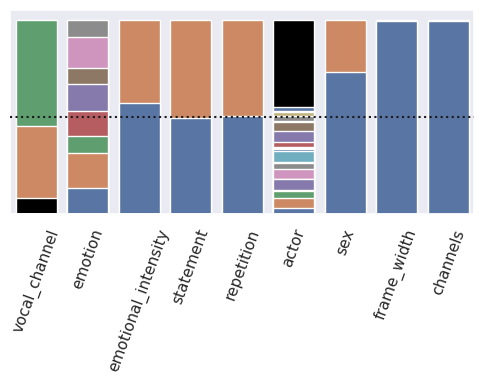

In [114]:
fig,ax = plt.subplots(figsize=(5,4))
wrong_samples = np.where((df.sc_min==0)&(df.stft_min==0))
df_clean_labels = df.copy()
df_clean_labels.vocal_channel.fillna("N/A", inplace=True)
df_clean_labels.replace({'statement': {"Dogs are sitting by the door": "statement 1", 
                                        "Kids are talking by the door": "statement 2"}}, inplace=True)
                                        
df_clean_labels.actor = pd.Categorical(df_clean_labels.actor).codes
df_clean_labels.replace({'actor': {-1: "N/A"}}, inplace=True)

ciuccia = df_clean_labels.iloc[wrong_samples]

for i, cat in enumerate(categorical_features):
    okay = np.zeros(len(ciuccia))
    row = ciuccia[cat].apply(str)
    for j, value in enumerate(np.unique(row)):
        y = np.zeros(len(categorical_features))
        okay = (okay)|(row == value)
        y[i] = np.sum(okay)/len(ciuccia)

        if value == "N/A":
            color = "black"
        else:
            color = sns.color_palette()[j%10]
        # print(f"{cat} - {value} -> {np.sum(okay)}")
        sns.barplot(x=categorical_features, y =y, ax = ax, alpha=1, color=color, zorder=-j)
        # ax.annotate(value, xy=(i-0.2, y[i]-0.2), rotation=45)
ax.set_xticks(range(len(categorical_features)), labels=categorical_features, rotation=70)
ax.set_yticks([])
ax.axhline(0.5, ls=":", zorder=100, color='k')
print()
fig.savefig("categorical_bars_wrong.pdf")

#### Chi-squared test 

In [115]:
from scipy.stats import chisquare, chi2_contingency

df_whole = df.copy()
df_whole.actor = pd.Categorical(df_whole.actor).codes
df_whole.replace({'actor': {-1: "N/A"}}, inplace=True)
df_whole.actor = df_whole.actor.apply(str)
df_whole.fillna("NA", inplace=True)

filter = (df_whole.sc_min == 0.0)&(df_whole.stft_min == 0.0) 
wrong_samples = np.where(filter)
right_samples = np.where(np.logical_not(filter))


df_rig = df_whole.iloc[right_samples]
df_pat = df_whole.iloc[wrong_samples]

ps = []

for cat in categorical_features:
    rig_occ = df_rig.groupby(cat).size().values
    pat_occ = df_pat.groupby(cat).size().values
    if cat == "actor":
        print(set(np.unique(df_rig[cat] )) - set(np.unique(df_pat[cat])))
    if cat != "actor" and cat != "frame_width" and cat != "channels":
        chisq, p, dof, ex = chi2_contingency([pat_occ, rig_occ])
        # chisq,p = chisquare(pat_occ, f_exp=rig_occ)
        print(f"{cat}: \tchisq = {chisq}\tp = {p}\tdof = {dof}")
        print(f"\tpat {pat_occ} \texp_pat {ex[0]}")
        print(f"\trig {rig_occ} \texp_rig {ex[1]}")
        ps.append(p)
        print()
  
for p in ps:
    print(p, end = " &")

vocal_channel: 	chisq = 0.16069969321563918	p = 0.9227934537489699	dof = 2
	pat [ 83 379 559] 	exp_pat [ 81.61337684 383.49959217 555.887031  ]
	rig [113 542 776] 	exp_rig [114.38662316 537.50040783 779.112969  ]

emotion: 	chisq = 28.75751199378281	p = 0.00016018190126627812	dof = 7
	pat [136 185  89 130 143  84 163  91] 	exp_pat [156.56443719 156.56443719  79.94779772 156.56443719 156.56443719
  78.2822186  156.56443719  79.94779772]
	rig [240 191 103 246 233 104 213 101] 	exp_rig [219.43556281 219.43556281 112.05220228 219.43556281 219.43556281
 109.7177814  219.43556281 112.05220228]

emotional_intensity: 	chisq = 8.205457282913688	p = 0.004176458191180124	dof = 1
	pat [585 436] 	exp_pat [549.6411093 471.3588907]
	rig [735 696] 	exp_rig [770.3588907 660.6411093]

statement: 	chisq = 0.16782439490476375	p = 0.6820526190859094	dof = 1
	pat [505 516] 	exp_pat [510.5 510.5]
	rig [721 710] 	exp_rig [715.5 715.5]

repetition: 	chisq = 0.10740761273904881	p = 0.7431150570943177	dof = 1
	p

/home/djanloo/.local/share/virtualenvs/dynamiting-oYIjB6ZE/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


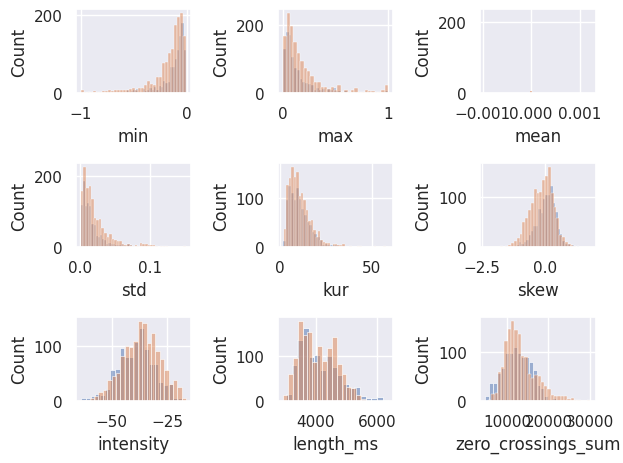

In [116]:
wrong_samples = (df.sc_min == 0)&(df.stft_min == 0)
correct_samples = np.logical_not(wrong_samples)
fig, axes = plt.subplots(3,3)
axes = axes.flatten()
for cat ,ax in zip(trivial_quant_features, axes):
    sns.histplot(df[cat].loc[wrong_samples], ax=ax, label="wrong",alpha=0.5)
    sns.histplot(df[cat].loc[correct_samples], ax=ax, label="correct", alpha=0.5)

/home/djanloo/.local/share/virtualenvs/dynamiting-oYIjB6ZE/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


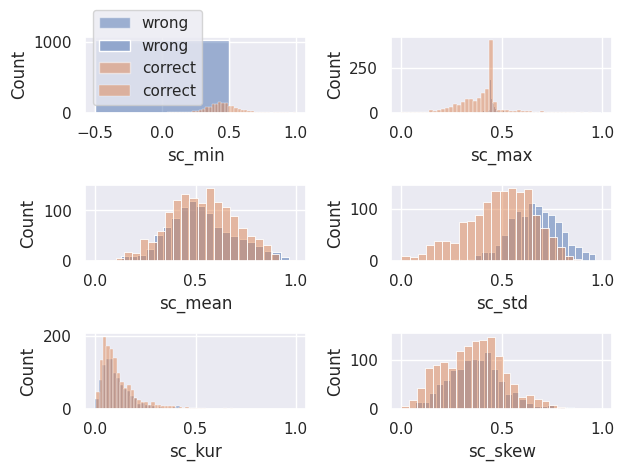

In [117]:
wrong_samples = (df.sc_min == 0)&(df.stft_min == 0)
correct_samples = np.logical_not(wrong_samples)
fig, axes = plt.subplots(3,2)
axes = axes.flatten()
for cat ,ax in zip(sc_family, axes):
    sns.histplot(df[cat].loc[wrong_samples], ax=ax, label="wrong",alpha=0.5)
    sns.histplot(df[cat].loc[correct_samples], ax=ax, label="correct", alpha=0.5)
axes[0].legend()

/home/djanloo/.local/share/virtualenvs/dynamiting-oYIjB6ZE/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


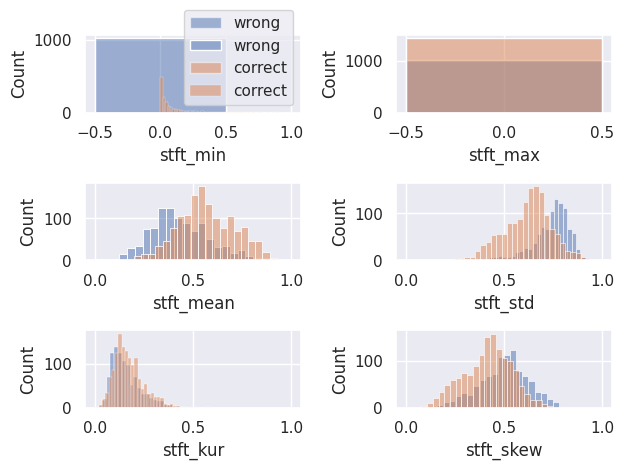

In [118]:
wrong_samples = (df.sc_min == 0)&(df.stft_min == 0)
correct_samples = np.logical_not(wrong_samples)
fig, axes = plt.subplots(3,2)
axes = axes.flatten()
for cat ,ax in zip(stft_family, axes):
    sns.histplot(df[cat].loc[wrong_samples], ax=ax, label="wrong",alpha=0.5)
    sns.histplot(df[cat].loc[correct_samples], ax=ax, label="correct", alpha=0.5)
axes[0].legend()

/home/djanloo/.local/share/virtualenvs/dynamiting-oYIjB6ZE/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


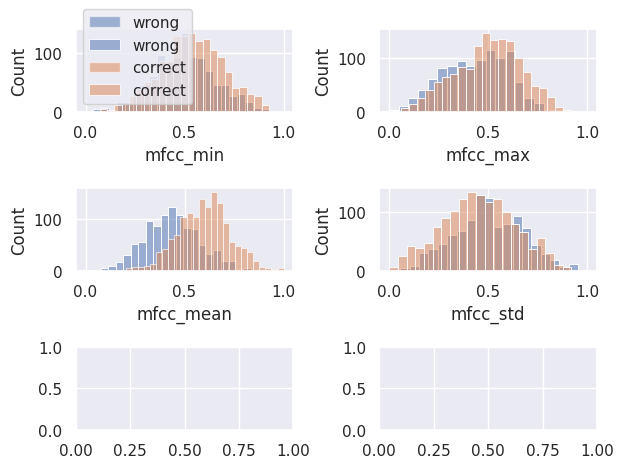

In [119]:
wrong_samples = (df.sc_min == 0)&(df.stft_min == 0)
correct_samples = np.logical_not(wrong_samples)
fig, axes = plt.subplots(3,2)
axes = axes.flatten()
for cat ,ax in zip(mfcc_family, axes):
    sns.histplot(df[cat].loc[wrong_samples], ax=ax, label="wrong",alpha=0.5)
    sns.histplot(df[cat].loc[correct_samples], ax=ax, label="correct", alpha=0.5)
axes[0].legend()

### Transformations

We log-scale the features listed in the distribution section, with particular attention to `mean` since can have negative values

In [120]:
log_scalable_features = ["max"] # Patological (stft_min, sc_min) omitted
for feature in log_scalable_features:
    df[feature] = np.log(df[feature])

In [121]:
# Check for infinite values
np.logical_not(np.isfinite(df[quantitative_features].values)).sum(axis=0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

#### Replacing values

Since zeros are spurious, maybe a possible strategy is to replace `_min` with `_mean` or a function of it

As it can be seen, `sc_mean` can replace `sc_min` if scaled by a factor $\approx 4$, while `stft_mean` seems to have a more complex relaton with `stft_min`.

First we try to divide `sc_min` by the approximate factor and scaling a log-transform `stft_mean`:

Now two things are clear:
- `stft_min` (from now $\mathcal{F}_{ min}$) can be replaced by the log-transformed scaled `stft_mean` ($\langle \mathcal{F}\rangle $) value
- `sc_min` ($S_{min}$) can be replaced with a scaled version of `sc_mean` ($\langle S \rangle$)

So we proceed to estimate the proportionality coefficients:

$$\mathcal{F}_{min} \leftarrow \alpha \langle \mathcal{F} \rangle + \beta $$
$$S \leftarrow \gamma \langle S \rangle + \delta$$


This is a regression on a single feature for patological values. More realistically one can perform a LR on the same class of parameters (`sc_`, `stft_`) or see if correct values are somewhat higli correlated to some other feature.

sc_skew              -0.163778
zero_crossings_sum    0.287142
Name: sc_min, dtype: float64
mfcc_std     0.475550
stft_skew   -0.482892
Name: stft_min, dtype: float64


/home/djanloo/.local/share/virtualenvs/dynamiting-oYIjB6ZE/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


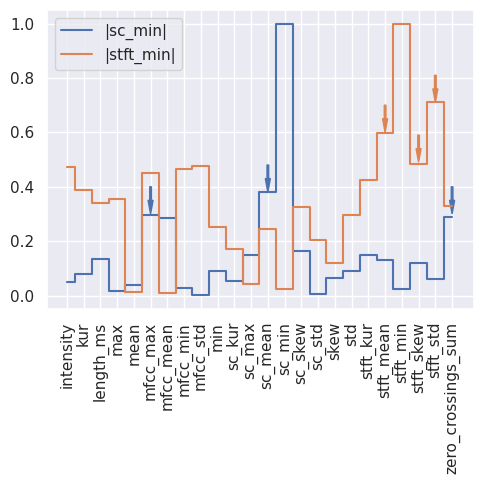

In [122]:
# Exclude patologic samples
df_correlations = df.drop(columns=["stft_max"])
try:
    quantitative_features.remove("stft_max")
except Exception as e:
    print(e)
filter = (df.sc_min != 0.0)&(df.stft_min!= 0.0) 
correct_samples = np.where(filter)
wrong_samples = np.where(np.logical_not(filter))

plt.figure(figsize=(5,5))
# Correlation on the correct samples
correct_corr = df[quantitative_features].iloc[correct_samples].corr(method="pearson")
print(correct_corr["sc_min"][["sc_skew", "zero_crossings_sum"]])
print(correct_corr["stft_min"][["mfcc_std", "stft_skew"]])

plt.step(range(len(quantitative_features)), correct_corr["sc_min"].abs(), where="mid", label="|sc_min|")
plt.step(range(len(quantitative_features)), correct_corr["stft_min"].abs(), where="mid", label="|stft_min|")
plt.legend()
plt.xticks(range(len(quantitative_features)), labels=quantitative_features, rotation=90)
# plt.title("Correlation of correct samples of patological features with other")
plt.arrow(5, 0.4, 0, -0.05, width=0.1, head_length=0.05,  color=sns.color_palette()[0])
plt.arrow(12, 0.48, 0, -0.05, width=0.1, head_length=0.05,  color=sns.color_palette()[0])
plt.arrow(23, 0.4, 0, -0.05, width=0.1, head_length=0.05,  color=sns.color_palette()[0])

plt.arrow(19, 0.7, 0, -0.05, width=0.1, head_length=0.05,  color=sns.color_palette()[1])
plt.arrow(21, 0.59, 0, -0.05, width=0.1, head_length=0.05,  color=sns.color_palette()[1])
plt.arrow(22, 0.81, 0, -0.05, width=0.1, head_length=0.05,  color=sns.color_palette()[1])

plt.savefig("correlation_pathological.pdf")


Corrections

In [123]:
from sklearn.linear_model import LinearRegression

# Selects the patological samples
patological = (df.sc_min == 0.0) & (df.stft_min==0.0)
correct = np.logical_not(patological)

print(f"There are {np.sum(patological)} patological samples")

# Multivariate linear regression is executed over ALL the good parameters
# and predicts both the patological features
X=df[["stft_mean", "stft_skew", "stft_std","mfcc_max", "sc_mean", "zero_crossings_sum"]].values
Y=df[["sc_min", "stft_min"]].values

# Transforms the correct values of stft_min in logarithmic scale
# Because the model works better in log scale (exponentially distributed data are not
# well fitted with a linear model)

Y[correct,1] = np.log(Y[correct,1])

model=LinearRegression()


model.fit(X[correct],Y[correct])
# Now estimates the patological samples 
Y_estimated=model.predict(X[patological])

corrected_dataset = df.copy()
corrected_dataset.sc_min.loc[patological] = Y_estimated[:,0]
corrected_dataset.stft_min.loc[patological] = Y_estimated[:,1]
corrected_dataset.stft_min.loc[correct] =  np.log(corrected_dataset.stft_min.loc[correct])

There are 1021 patological samples


/tmp/ipykernel_8739/2253941155.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corrected_dataset.sc_min.loc[patological] = Y_estimated[:,0]
/tmp/ipykernel_8739/2253941155.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corrected_dataset.stft_min.loc[patological] = Y_estimated[:,1]
/tmp/ipykernel_8739/2253941155.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corrected_dataset.stft_min.loc[correct] =  np.log(corrected_dat

Renormalization

In [124]:
for family in [mfcc_family, sc_family, stft_family]:
    for feature in family:
        df[feature] = MinMaxScaler().fit_transform(df[feature].to_numpy().reshape(-1,1))

Check for the distributions

/home/djanloo/.local/share/virtualenvs/dynamiting-oYIjB6ZE/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


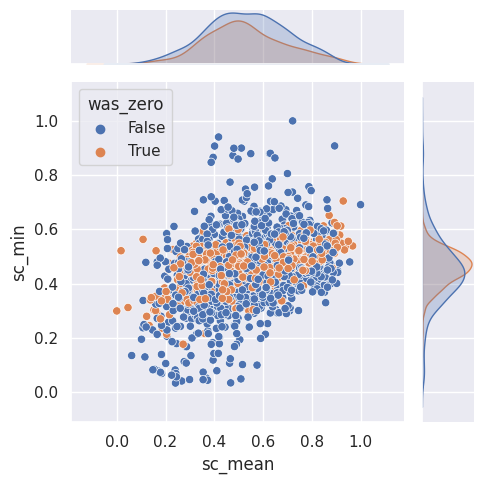

In [125]:
from sklearn.preprocessing import MinMaxScaler

was_zero = (df.sc_min == 0)
tmp_df = pd.DataFrame(dict(sc_mean=corrected_dataset.sc_mean, sc_min=corrected_dataset.sc_min , was_zero=was_zero))

sns.jointplot(data=tmp_df, x="sc_mean", y="sc_min", hue="was_zero", height=5)
plt.savefig("patological_sc_corrected.pdf")

/home/djanloo/.local/share/virtualenvs/dynamiting-oYIjB6ZE/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


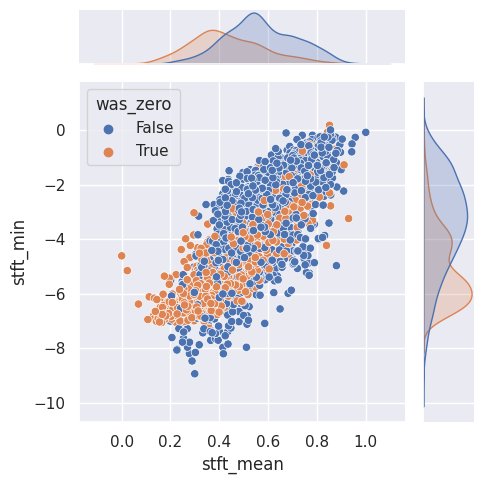

In [126]:
from sklearn.preprocessing import MinMaxScaler

s = MinMaxScaler()
was_zero = (df.stft_min == 0)
tmp_df = pd.DataFrame(dict(stft_mean=corrected_dataset.stft_mean, stft_min=corrected_dataset.stft_min, was_zero=was_zero))

sns.jointplot(data=tmp_df, x="stft_mean", y="stft_min", hue="was_zero", height=5)
plt.savefig("patological_stft_corrected.pdf")

In [127]:
corrected_dataset["log_amp_pp"] = corrected_dataset["max"] - corrected_dataset["min"]
corrected_dataset.drop(columns= ["min", "max"])
try:
    quantitative_features.remove("min")
    quantitative_features.remove("max")
    quantitative_features.append("log_amp_pp")
except ValueError as e:
    print(e)

Now we copy the corrected dataset back into df

In [128]:
df = corrected_dataset.copy()

#### Vocal channel classificator

In [129]:
missing = df[quantitative_features].loc[df.vocal_channel.isna()]
classified = df[quantitative_features].loc[np.logical_not(df.vocal_channel.isna())]
labels = pd.Categorical(df.vocal_channel.loc[np.logical_not(df.vocal_channel.isna())])
label_map = dict(np.array([np.unique(labels.codes), np.unique(labels)]).T)

K-fold check to see classification power

/home/djanloo/.local/share/virtualenvs/dynamiting-oYIjB6ZE/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


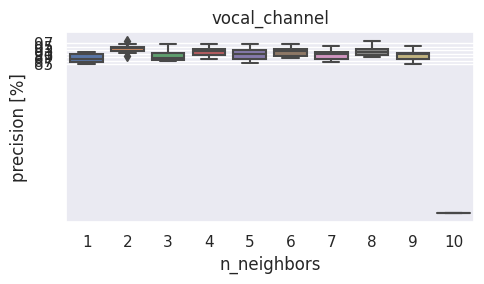

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier


fig, ax = plt.subplots(figsize=(5,3))
N_samples = 10

precision = np.zeros((N_samples, 10 ))
n_neighbs = np.array(range(9))
for k in range(N_samples):
    for n in n_neighbs:
        neigh = KNeighborsClassifier(n_neighbors=n+1)
        X_train, X_test, y_train, y_test = train_test_split(classified, labels.codes, random_state=k, test_size= 0.08)
        neigh.fit(X_train, y_train)
        predicted = neigh.predict(X_test)
        precision[k,n] = precision_score(y_test, predicted)

precision_df = pd.DataFrame()
for i in range(10):
    precision_df[str(i+1)] = precision[:,i]*100
sns.boxplot(precision_df, ax=ax)
plt.xlabel("n_neighbors")
plt.ylabel("precision [%]")
plt.title("vocal_channel")
plt.yticks([85, 87, 89, 91, 93, 95, 97])
plt.savefig("classificator_precision_vocal_channel.pdf")

In [131]:
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(classified, labels.codes)
predicted = neigh.predict(missing)
pred_labels = np.vectorize(label_map.get)(predicted)
filled_df = df.copy()
filled_df.vocal_channel.loc[df.vocal_channel.isna()] = pred_labels
df = filled_df.copy()
# print(df.vocal_channel.isna().sum())

/tmp/ipykernel_8739/878675193.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filled_df.vocal_channel.loc[df.vocal_channel.isna()] = pred_labels


#### Actor classificator

/home/djanloo/.local/share/virtualenvs/dynamiting-oYIjB6ZE/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


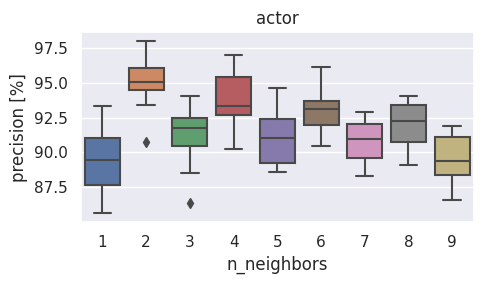

In [149]:
missing = df[quantitative_features].loc[df.actor.isna()]
classified = df[quantitative_features].loc[np.logical_not(df.actor.isna())]
labels = pd.Categorical(df.vocal_channel.loc[np.logical_not(df.actor.isna())])
label_map = dict(np.array([np.unique(labels.codes), np.unique(labels)]).T)

fig, ax = plt.subplots(figsize=(5,3))
N_samples = 10

n_neighbs = np.array(range(1,10))
precision = np.zeros((N_samples, len(n_neighbs) ))


for k in range(N_samples):
    for i, n in enumerate(n_neighbs):
        neigh = KNeighborsClassifier(n_neighbors=n)
        X_train, X_test, y_train, y_test = train_test_split(classified, labels.codes, random_state=k+i, test_size= 0.4)
        neigh.fit(X_train, y_train)
        predicted = neigh.predict(X_test)
        precision[k,i] = precision_score(y_test, predicted)

precision_df = pd.DataFrame()
for i in range(len(n_neighbs)):
    precision_df[str(n_neighbs[i])] = precision[:,i]*100
sns.boxplot(precision_df, ax=ax)
plt.xlabel("n_neighbors")
plt.ylabel("precision [%]")
plt.title("actor")
plt.savefig("classificator_precision_actor.pdf")

### Correlations

Categorical features cannot be correlated using Spearman correlation, so it is necessary to split `cat/quant`.

- Spearman correlation for numeric data
- [Cramer's V](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V) for categorical data

A _label encoding_ is necessary to perform Cramer's V.

Finally, a cross corrrelation has to be chosen (TODO)

#### Categorical

In [84]:
# Categorical encoding
df_encoded = pd.DataFrame()
for feature in categorical_features:
    # Note: NaN values are converted to -1
    df_encoded[feature] = pd.Categorical(df[feature]).codes

df_encoded.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,frame_width,channels
0,1,3,0,0,1,1,0,0,0
1,1,0,0,0,0,15,0,0,0
2,0,4,1,0,1,15,0,0,0
3,1,7,0,1,0,13,0,0,0
4,0,4,1,0,1,1,0,0,0


/home/djanloo/.local/share/virtualenvs/dynamiting-oYIjB6ZE/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/djanloo/.local/share/virtualenvs/dynamiting-oYIjB6ZE/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


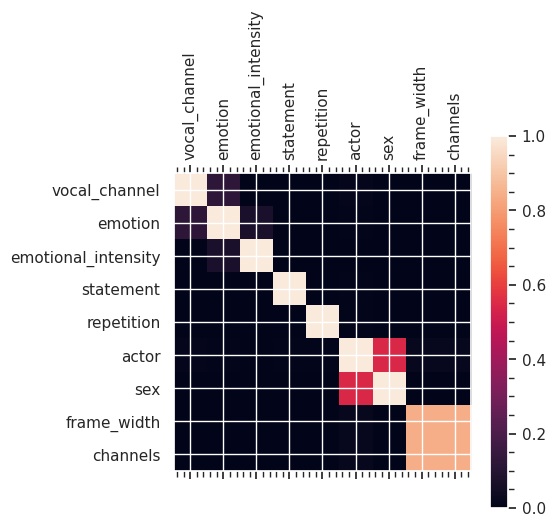

In [85]:
from scipy.stats import chi2_contingency

# Implement Cramer's V
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

V = np.zeros((len(df_encoded.columns), len(df_encoded.columns)))

for i,row in enumerate(df_encoded.columns):
  for j,col in enumerate(df_encoded.columns):
    V[i,j] =  cramers_V(df_encoded[row], df_encoded[col])
plt.matshow(V)
plt.xticks(range(len(df_encoded.columns)),labels=df_encoded.columns, rotation=90,)
plt.yticks(range(len(df_encoded.columns)),labels=df_encoded.columns)
plt.colorbar()


The only features that appear to be "V-correlated" are the sex and actor feature, that is intuitively correct.
The not complete correation is probably due to the missing values in the actor feature.

#### Numeric

<AxesSubplot: >

/home/djanloo/.local/share/virtualenvs/dynamiting-oYIjB6ZE/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


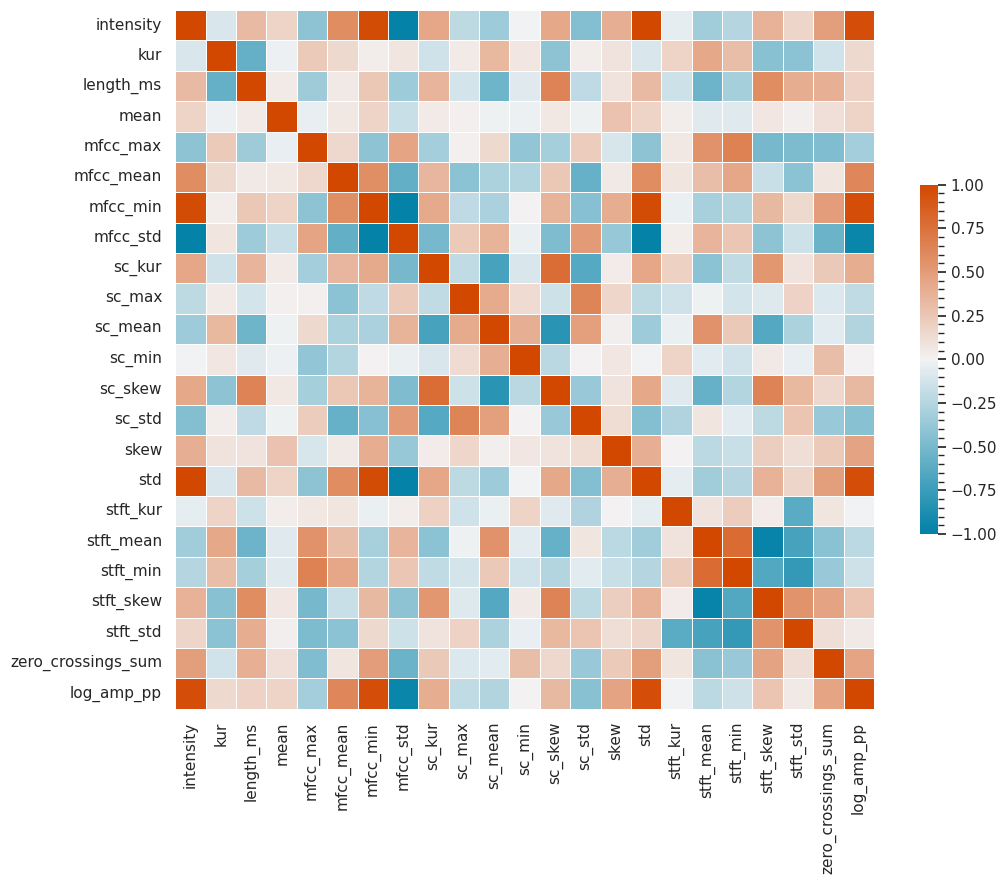

In [86]:
corr = df[quantitative_features].corr(method="spearman")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, s=100, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Violin plots

/home/djanloo/.local/share/virtualenvs/dynamiting-oYIjB6ZE/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


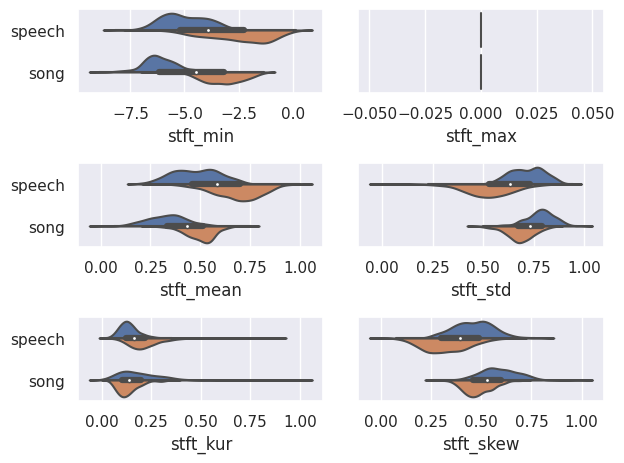

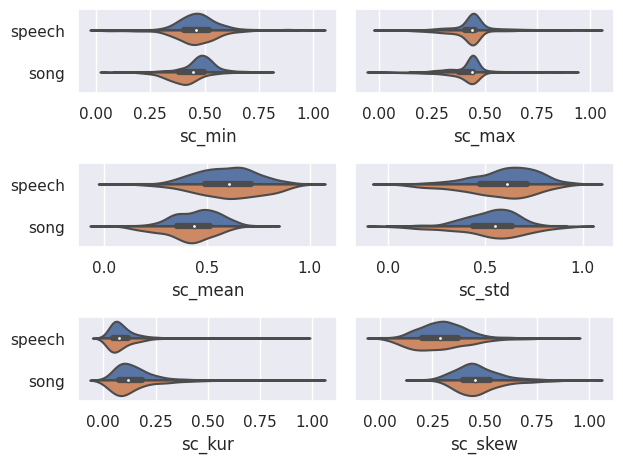

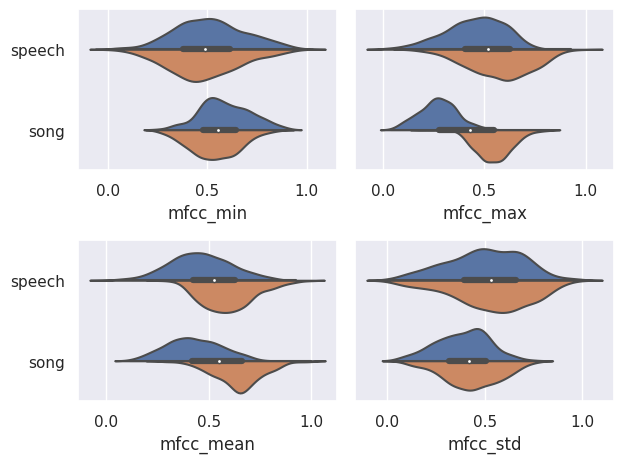

In [87]:
fig, axes = plt.subplots(3,2, sharey=True)
for ax, feat in zip(axes.flatten(), stft_family):
    sns.violinplot(data=df, y="vocal_channel", x=feat, hue="sex", split=True, ax=ax)
    ax.set_ylabel("")
    ax.get_legend().remove()

fig, axes = plt.subplots(3,2, sharey=True)
for ax, feat in zip(axes.flatten(), sc_family):
    sns.violinplot(data=df, y="vocal_channel", x=feat, hue="sex", split=True, ax=ax)
    ax.set_ylabel("")
    ax.get_legend().remove()

fig, axes = plt.subplots(2,2, sharey=True)
for ax, feat in zip(axes.flatten(), mfcc_family):
    sns.violinplot(data=df, y="vocal_channel", x=feat, hue="sex", split=True, ax=ax)
    ax.set_ylabel("")
    ax.get_legend().remove()

/home/djanloo/.local/share/virtualenvs/dynamiting-oYIjB6ZE/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


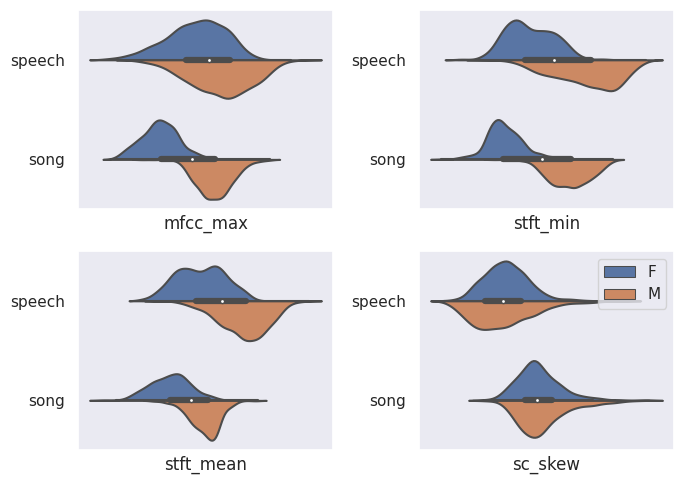

In [88]:
cool_features = ["mfcc_max", "stft_min", "stft_mean", "sc_skew"]

fig, axes = plt.subplots(2,2, figsize=(7,5))
axes = axes.flatten()

for ax, feat in zip(axes, cool_features):
    sns.violinplot(data=df, y="vocal_channel", x=feat, hue="sex", split=True, ax=ax)
    ax.set_ylabel("")
    ax.set_xticks([])
    ax.get_legend().remove()
ax.legend()
fig.savefig("violin.pdf")


/home/djanloo/.local/share/virtualenvs/dynamiting-oYIjB6ZE/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


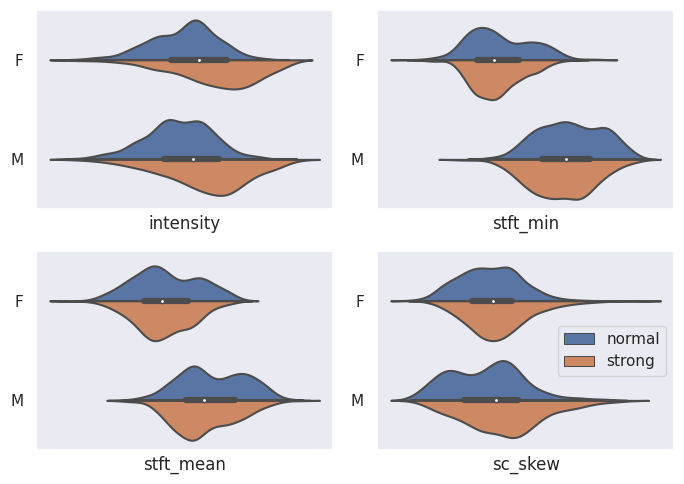

In [89]:
cool_features = ["intensity", "stft_min", "stft_mean", "sc_skew"]

fig, axes = plt.subplots(2,2, figsize=(7,5))
axes = axes.flatten()

for ax, feat in zip(axes, cool_features):
    sns.violinplot(data=df, y="sex", x=feat, hue="emotional_intensity", split=True, ax=ax)
    ax.set_ylabel("")
    ax.set_xticks([])
    ax.get_legend().remove()
ax.legend()
fig.savefig("violin.pdf")

### Saving the clean dataset

Better to fill remaining Nan values to `not available` (`N/A`)

In [90]:
clean_categorical = df[categorical_features].fillna(value="GNAA")
clean_quantitative = df[quantitative_features].drop(columns=[ "std"])

display(clean_categorical)
display(clean_quantitative)

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,frame_width,channels
0,speech,fearful,normal,Dogs are sitting by the door,2nd,2.0,F,2,1
1,speech,angry,normal,Dogs are sitting by the door,1st,16.0,F,2,1
2,song,happy,strong,Dogs are sitting by the door,2nd,16.0,F,2,1
3,speech,surprised,normal,Kids are talking by the door,1st,14.0,F,2,1
4,song,happy,strong,Dogs are sitting by the door,2nd,2.0,F,2,1
...,...,...,...,...,...,...,...,...,...
2447,speech,calm,strong,Kids are talking by the door,1st,23.0,M,2,1
2448,speech,calm,normal,Dogs are sitting by the door,1st,23.0,M,2,1
2449,song,sad,strong,Dogs are sitting by the door,2nd,23.0,M,2,1
2450,speech,surprised,normal,Kids are talking by the door,1st,GNAA,M,2,1


,intensity,kur,length_ms,mean,mfcc_max,mfcc_mean,mfcc_min,mfcc_std,sc_kur,sc_max,sc_mean,sc_min,sc_skew,sc_std,skew,stft_kur,stft_mean,stft_min,stft_skew,stft_std,zero_crossings_sum,log_amp_pp
0,-36.793432,9.406061,3737,3.844916e-07,0.295213,0.364634,0.529265,0.454352,0.123738,0.599230,0.648163,0.589588,0.325936,0.551824,0.273153,0.184467,0.394443,-4.950095,0.568130,0.689802,16995,-1.845035
1,-33.800066,19.564187,3904,-7.149491e-08,0.511665,0.505299,0.595352,0.417233,0.048477,0.442238,0.535794,0.447817,0.312511,0.766001,0.292157,0.115827,0.398830,-5.314968,0.522350,0.782470,13906,-1.029642
2,-32.290737,4.881241,4671,2.429985e-06,0.254710,0.468918,0.576001,0.382435,0.122017,0.442998,0.466500,0.498123,0.405462,0.553049,0.302659,0.173137,0.324847,-6.287114,0.595302,0.781861,18723,-1.656172
3,-49.019839,13.040259,3637,2.373929e-07,0.414398,0.273763,0.388681,0.677553,0.054609,0.447119,0.569571,0.469495,0.260804,0.769826,-0.081014,0.091015,0.378808,-6.048005,0.515785,0.827419,11617,-3.699067
4,-31.214503,7.485109,4404,8.454691e-07,0.226628,0.438075,0.616639,0.342806,0.115161,0.444813,0.526047,0.511767,0.430878,0.586275,0.414872,0.122901,0.395862,-5.808495,0.533742,0.772979,15137,-1.223860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,-45.580781,9.551363,4605,9.367040e-07,0.532307,0.479754,0.367883,0.669721,0.037905,0.463646,0.665936,0.457807,0.297445,0.788032,0.759247,0.240929,0.705406,-2.819504,0.278021,0.519084,9871,-2.909018
2448,-43.342901,22.517991,4171,4.614221e-07,0.614230,0.446749,0.416842,0.657740,0.033188,0.448783,0.801189,0.482639,0.169734,0.811306,1.073633,0.261145,0.739077,-2.658375,0.238209,0.529187,8963,-2.412220
2449,-36.258689,4.964319,5239,-8.219263e-06,0.710022,0.624178,0.508204,0.485320,0.084011,0.463306,0.433147,0.345787,0.483656,0.823259,-0.005821,0.079461,0.497864,-3.763572,0.457061,0.757514,9765,-2.237294
2450,-45.751265,13.855588,3737,-4.400898e-06,0.608049,0.549763,0.348377,0.679496,0.060508,0.440366,0.597579,0.358639,0.306903,0.632335,-0.110966,0.159271,0.715243,-3.225348,0.305430,0.542120,9716,-2.898918


Now drop the removed features

In [91]:
try:
    clean_categorical.drop(columns=["frame_width", "channels"], inplace=True)
    clean_quantitative.drop(columns=["stft_max"], inplace=True)
except KeyError as e:
    print(e)

"['stft_max'] not found in axis"


In [92]:
# Local
clean_quantitative.to_csv("ravdess_quantitative.csv", index=False)
clean_categorical.to_csv("ravdess_categorical.csv", index=False)

# Next part's folder
clean_quantitative.to_csv("../CLUSTERING/ravdess_quantitative.csv", index=False)
clean_categorical.to_csv("../CLUSTERING/ravdess_categorical.csv", index=False)